# Basic PyTorch Neural Network

* create a multi-layer deep learning model
* load data
* train and validate the model<br>

* save and load a trained model(last)

Our goal -
To develop a model capable of classifying an iris plant based on four features. 

- This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>).
- The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores).
- Our loss function will compare the target label (ground truth) to the corresponding output score. 

<a><h3><u> Standard imports

In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a><h3><u> Create a Model Class

In [126]:
# input - 4 features so 4 NEURONS
# 2 hiden layers of 8, 9 NEURONS each
# output layer  = 3 categories so , 3 NEURONS

# pre activation function - (aggregator) - Linear function - W*X+B
# Activation function - Relu

# loss - Cross Entropy (as we need probabilities)
# algorithm - Adam 

In [127]:
# ___init__ should contain how many layers we need
# input Layer (4 features) ---> h1 (8N) ---> h2 (9N) ---> O/P (3 classes)

In [128]:
class Model(nn.Module):
    def __init__ (self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        # fc1 - fully connected layer 1
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

        # for simplicity we used x in all three statements
        # x1 = F.relu(self.fc1(x))
        # x2 = F.relu(self.fc2(x1))
        # x3 = self.out(x2)
        # return x3

In [129]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

<a><h3><u> Load the iris Dataset

In [130]:
df= pd.read_csv("Data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<a> <h> Plot the Dataset

<a><h3> <u> Perform Train/Test/Split


In [131]:
X=df.drop('target',axis=1).values
y= df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


<a><u><h3> Prepare DataLoader

Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets.

In [132]:
trainloader = DataLoader(X_train, batch_size=60,shuffle=True)

testloader = DataLoader(X_test, batch_size=60,shuffle=False)

<a><h3><u> Define loss equations and optimizations


In [133]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [134]:
#Loss Function - cros Entropy
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

<a><h3><u> Train the Model

In [135]:
epochs = 100
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

# a neat trick to save screen space:
#if i%10 == 0:
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  0  loss: 1.09568226
epoch:  1  loss: 1.08040512
epoch:  2  loss: 1.07033861
epoch:  3  loss: 1.06087792
epoch:  4  loss: 1.05071282
epoch:  5  loss: 1.03998208
epoch:  6  loss: 1.02909625
epoch:  7  loss: 1.01826751
epoch:  8  loss: 1.00721562
epoch:  9  loss: 0.99531204
epoch: 10  loss: 0.98190629
epoch: 11  loss: 0.96687967
epoch: 12  loss: 0.95038033
epoch: 13  loss: 0.93217224
epoch: 14  loss: 0.91220015
epoch: 15  loss: 0.89048469
epoch: 16  loss: 0.86701298
epoch: 17  loss: 0.84186012
epoch: 18  loss: 0.81504059
epoch: 19  loss: 0.78653044
epoch: 20  loss: 0.75652379
epoch: 21  loss: 0.72590339
epoch: 22  loss: 0.69671160
epoch: 23  loss: 0.66983062
epoch: 24  loss: 0.64395487
epoch: 25  loss: 0.61811143
epoch: 26  loss: 0.59124285
epoch: 27  loss: 0.56446719
epoch: 28  loss: 0.53923553
epoch: 29  loss: 0.51587290
epoch: 30  loss: 0.49447367
epoch: 31  loss: 0.47492424
epoch: 32  loss: 0.45280999
epoch: 33  loss: 0.43679962
epoch: 34  loss: 0.42453590
epoch: 35  loss: 0.4

<a><h3><u> Plot the Loss Function

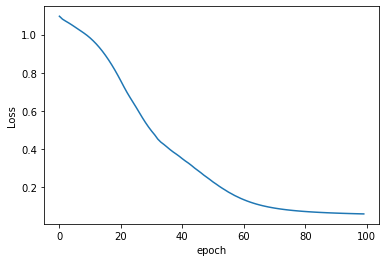

In [136]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

<a><h3><u> Validate the Model

- Torch.no_grad() deactivates autograd engine.

- Eventually it will reduce the memory usage and speed up computations.

- Use of Torch.no_grad():

    * To perform inference without Gradient Calculation.

    * To make sure there's no leak test data into the model.


In [137]:
# To Evaluate the Entire Test set
# no_grad ensure that gradient is not calculated and weights and bias are not updated

with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val , y_test)
print(f'{loss:.8f}')


0.06247772


In [138]:
# this loss tells us that we are not overfitting the data

In [139]:
# to print out the results on Test DataSet
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print("{:2}. {:38}  {}".format(i+1, str(y_val), y_test[i]))
        
        if y_val.argmax().item() == y_test[i]:
            correct= correct+1

print("\n{} out of {} = {:.2f}%  correct".format(correct, len(y_test), 100*correct/len(y_test)))

 1. tensor([-0.3360,  7.3629,  1.3780])     1
 2. tensor([0.2770, 8.1552, 0.4267])        1
 3. tensor([ 11.9968,   6.1842, -19.1980])  0
 4. tensor([-2.0192,  7.9662,  4.2445])     1
 5. tensor([-6.1353,  7.9516, 11.0908])     2
 6. tensor([-10.2640,   8.3102,  17.9992])  2
 7. tensor([ 12.0541,   6.4316, -19.2913])  0
 8. tensor([ 12.9496,   6.4815, -20.7530])  0
 9. tensor([-5.7727,  8.2435, 10.5079])     2
10. tensor([-7.8872,  8.6126, 14.0726])     2
11. tensor([-8.7060,  8.6074, 15.4331])     2
12. tensor([ 11.6348,   5.8164, -18.6210])  0
13. tensor([-8.1013,  8.2331, 14.3883])     2
14. tensor([-2.0796,  7.7751,  4.3185])     1
15. tensor([-6.0833,  8.3916, 11.0582])     2
16. tensor([0.1354, 7.8658, 0.6407])        1
17. tensor([-4.0880,  7.7216,  7.6638])     2
18. tensor([ 13.1511,   6.5907, -21.0787])  0
19. tensor([-1.5649,  8.0220,  3.4751])     1
20. tensor([-6.2865,  8.9727, 11.4244])     2
21. tensor([ 12.3848,   6.2568, -19.8265])  0
22. tensor([ 13.8199,   7.0854, -2

<a><h3><u> Save the Trained model to a file

To save this on disk.<br>
The tools we'll use are <a><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

<h3><a> Save the Model

In [140]:
torch.save(model.state_dict(), 'Saved_Models/IrisDatasetModel.pt')

<a><h3><u> Load a new Model

In [141]:
new_model = Model()
new_model.load_state_dict(torch.load('Saved_Models/IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [142]:
# checking on test set loss

with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247772


<a><h3><u> Apply the model to classify new, unseen data

In [150]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

In [151]:
with torch.no_grad():
    # This returns a tensor with 3 values, having value of each class
    print(new_model(mystery_iris))

tensor([ 12.2112,   7.1279, -19.5248])


In [152]:
# We can see that class-0 has highest value
# argmax returns maximum value index no
 
new_model(mystery_iris).argmax()

tensor(0)

In [153]:
print("Species - ",labels[new_model(mystery_iris).argmax()])

Species -  Iris setosa
